# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
# output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

In [3]:
# Previewing query json
test_city = 'los angeles'
params = {
    'appid': weather_api_key,
    'q': test_city,
    'units': 'imperial'
}

base_url = 'https://api.openweathermap.org/data/2.5/weather'

test_response = requests.get(base_url, params)
test_json = test_response.json()
pprint(test_json)

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 34.0522, 'lon': -118.2437},
 'dt': 1627680696,
 'id': 5368361,
 'main': {'feels_like': 88.9,
          'humidity': 46,
          'pressure': 1013,
          'temp': 87.48,
          'temp_max': 108.54,
          'temp_min': 68.23},
 'name': 'Los Angeles',
 'sys': {'country': 'US',
         'id': 3694,
         'sunrise': 1627650183,
         'sunset': 1627700133,
         'type': 1},
 'timezone': -25200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 250, 'speed': 4.61}}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
cities_name = []
cities_lat = []
cities_lng = []
cities_max_temp = []
cities_humidity = []
cities_cloudiness = []
cities_wind_speed = []
cities_country = []
cities_date = []

print('Beginning Data Retrieval')
print('-----------------------------')

counter = 0
set_count = 1

for city in cities:
    try:
        params = {
            'appid': weather_api_key,
            'q': city,
            'units': 'imperial'
        }
        response = requests.get(base_url, params)
        response_json = response.json()
        
        cities_name.append(response_json['name'])
        cities_lat.append(response_json['coord']['lat'])
        cities_lng.append(response_json['coord']['lon'])
        cities_max_temp.append(response_json['main']['temp_max'])
        cities_humidity.append(response_json['main']['humidity'])
        cities_cloudiness.append(response_json['clouds']['all'])
        cities_wind_speed.append(response_json['wind']['speed'])
        cities_country.append(response_json['sys']['country'])
        cities_date.append(response_json['dt'])
        
        counter = counter + 1
        
        if counter > 50:
            set_count = set_count + 1
            counter = 1
        
        print(f"Processing Record {counter} of Set {set_count} | {city}")
        
    except:
        print('City not found. Skipping...')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | grand island
Processing Record 2 of Set 1 | victoria
City not found. Skipping...
Processing Record 3 of Set 1 | sao sebastiao
Processing Record 4 of Set 1 | dongsheng
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | tura
Processing Record 8 of Set 1 | tuatapere
Processing Record 9 of Set 1 | hithadhoo
Processing Record 10 of Set 1 | nanortalik
Processing Record 11 of Set 1 | teacapan
Processing Record 12 of Set 1 | san jose
Processing Record 13 of Set 1 | punta arenas
City not found. Skipping...
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | rio grande
Processing Record 16 of Set 1 | thompson
Processing Record 17 of Set 1 | hualmay
City not found. Skipping...
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | aquiraz
Processing Record 20 of Set 1 | moree
Processing Record 21 of Set 1 | timizart
Proces

Processing Record 36 of Set 4 | dmanisi
Processing Record 37 of Set 4 | palauig
Processing Record 38 of Set 4 | verkhnyaya maksakovka
Processing Record 39 of Set 4 | ancud
Processing Record 40 of Set 4 | puerto quijarro
Processing Record 41 of Set 4 | talnakh
Processing Record 42 of Set 4 | cherskiy
Processing Record 43 of Set 4 | goderich
Processing Record 44 of Set 4 | vila franca do campo
Processing Record 45 of Set 4 | severo-kurilsk
Processing Record 46 of Set 4 | powell river
Processing Record 47 of Set 4 | naze
Processing Record 48 of Set 4 | torrington
City not found. Skipping...
Processing Record 49 of Set 4 | rawson
Processing Record 50 of Set 4 | iquique
City not found. Skipping...
Processing Record 1 of Set 5 | presidente medici
Processing Record 2 of Set 5 | arraial do cabo
Processing Record 3 of Set 5 | hilo
Processing Record 4 of Set 5 | alugan
Processing Record 5 of Set 5 | rabo de peixe
Processing Record 6 of Set 5 | dikson
Processing Record 7 of Set 5 | alice springs


Processing Record 27 of Set 8 | lixourion
Processing Record 28 of Set 8 | mikhaylovka
Processing Record 29 of Set 8 | guerrero negro
Processing Record 30 of Set 8 | les cayes
Processing Record 31 of Set 8 | sicuani
Processing Record 32 of Set 8 | gold coast
City not found. Skipping...
Processing Record 33 of Set 8 | cairns
Processing Record 34 of Set 8 | sioux lookout
Processing Record 35 of Set 8 | manokwari
Processing Record 36 of Set 8 | aksarka
Processing Record 37 of Set 8 | akyab
Processing Record 38 of Set 8 | khani
Processing Record 39 of Set 8 | marsh harbour
Processing Record 40 of Set 8 | tahe
Processing Record 41 of Set 8 | college
Processing Record 42 of Set 8 | zhigansk
Processing Record 43 of Set 8 | socorro
City not found. Skipping...
Processing Record 44 of Set 8 | tagusao
Processing Record 45 of Set 8 | soria
Processing Record 46 of Set 8 | lillooet
Processing Record 47 of Set 8 | katangli
Processing Record 48 of Set 8 | murgab
Processing Record 49 of Set 8 | salinas


Processing Record 12 of Set 12 | vila
Processing Record 13 of Set 12 | opuwo
City not found. Skipping...
Processing Record 14 of Set 12 | korem
Processing Record 15 of Set 12 | tupelo
Processing Record 16 of Set 12 | bognor regis
Processing Record 17 of Set 12 | bako
Processing Record 18 of Set 12 | muros
Processing Record 19 of Set 12 | havre-saint-pierre
Processing Record 20 of Set 12 | vila velha
Processing Record 21 of Set 12 | leh
Processing Record 22 of Set 12 | lampa
Processing Record 23 of Set 12 | beruwala
Processing Record 24 of Set 12 | raudeberg
Processing Record 25 of Set 12 | pustomyty
Processing Record 26 of Set 12 | port pirie
Processing Record 27 of Set 12 | kerrville
Processing Record 28 of Set 12 | lahaina
Processing Record 29 of Set 12 | ust-tsilma
Processing Record 30 of Set 12 | churintzio
Processing Record 31 of Set 12 | ponta delgada
Processing Record 32 of Set 12 | faya
Processing Record 33 of Set 12 | da nang
Processing Record 34 of Set 12 | marapanim
City not

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df = pd.DataFrame({
    'City': cities_name,
    'Lat': cities_lat,
    'Lng': cities_lng,
    'Max Temp': cities_max_temp,
    'Humidity': cities_humidity,
    'Cloudiness': cities_cloudiness,
    'Wind Speed': cities_wind_speed,
    'Country': cities_country,
    'Date':cities_date
})
weather_df.head(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Grand Island,40.9250,-98.3420,90.36,58,1,5.75,US,1627680884
1,Hong Kong,22.2855,114.1577,84.38,93,93,1.01,HK,1627680696
2,São Sebastião,-23.7600,-45.4097,54.28,73,87,3.56,BR,1627680680
3,Dongsheng,39.8161,109.9776,69.82,41,0,11.81,CN,1627680886
4,Vaini,-21.2000,-175.2000,73.56,94,90,8.05,TO,1627680886


In [6]:
weather_df.to_csv('output_data/weather_df.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
# Method 1
weather_df.loc[weather_df['Humidity'] > 100]

# # Method 2
humidity_df = weather_df['Humidity']
humidity_df.max()

print('No cities with humidity levels above 100%.')

No cities with humidity levels above 100%.


In [10]:
#  Get the indices of cities that have humidity over 100%.
print('No cities with humidity levels above 100%.')

No cities with humidity levels above 100%.


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
indexed_weather_df = weather_df.set_index('City')

humidity_df = weather_df['Humidity']
quartiles = humidity_df.quantile(q=[0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 - iqr)

print(f"Humidity values below {lower_bound} could be outliers.")
print(f"Humidity values above {upper_bound} could be outliers.")

print(humidity_df.loc[humidity_df < lower_bound])

# Dropping indices of cities with extreme humidity levels
clean_weather_df = weather_df.drop(index=[105, 248, 395])
clean_weather_df = weather_df

Humidity values below 14.375 could be outliers.
Humidity values above 58.25 could be outliers.
105    12
248    14
395    12
Name: Humidity, dtype: int64


In [13]:
# Extract relevant fields from the data frame
print(clean_weather_df.set_index('City'))

# Export the City_Data into a csv
clean_weather_df.to_csv('output_data/clean_weather_df.csv')

                     Lat       Lng  Max Temp  Humidity  Cloudiness  \
City                                                                 
Grand Island     40.9250  -98.3420     90.36        58           1   
Hong Kong        22.2855  114.1577     84.38        93          93   
São Sebastião   -23.7600  -45.4097     54.28        73          87   
Dongsheng        39.8161  109.9776     69.82        41           0   
Vaini           -21.2000 -175.2000     73.56        94          90   
...                  ...       ...       ...       ...         ...   
Marapanim        -0.7175  -47.6997     76.42        89          18   
Seredka          58.1584   28.1858     62.35        74          96   
Paamiut          61.9940  -49.6678     46.44        83         100   
Aleksandrov Gay  50.1470   48.5704     80.85        27          93   
Samarai         -10.6167  150.6667     79.77        76          95   

                 Wind Speed Country        Date  
City                                   

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

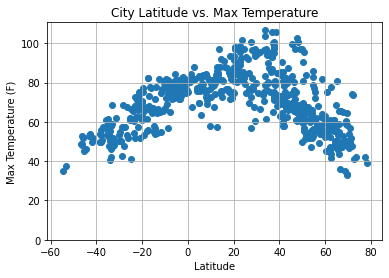

<Figure size 432x288 with 0 Axes>

In [14]:
plt.scatter(
    x=clean_weather_df['Lat'],
    y=clean_weather_df['Max Temp']
)
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.ylim(0)
plt.grid(True)
plt.show()

plt.savefig('output_data/Temperature (F) vs. Latitude.png')

In [15]:
print('The closer we get to a latitude between 0-20 or the equator, the warmer temperatures we see.')
print('The further we go in either extremes, the colder temperatures we see.')

The closer we get to a latitude between 0-20 or the equator, the warmer temperatures we see.
The further we go in either extremes, the colder temperatures we see.


## Latitude vs. Humidity Plot

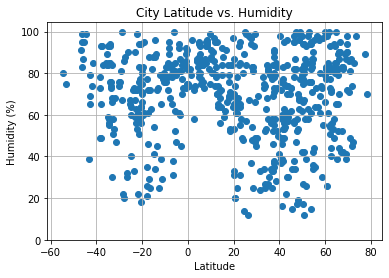

<Figure size 432x288 with 0 Axes>

In [16]:
plt.scatter(
    x=clean_weather_df['Lat'],
    y=clean_weather_df['Humidity']
)
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0)
plt.grid(True)
plt.show()

plt.savefig('output_data/Humidity (%) vs. Latitude.png')

In [17]:
print("We don't see a clear pattern in humidity as we get closer to the equator.")

We don't see a clear pattern in humidity as we get closer to the equator.


## Latitude vs. Cloudiness Plot

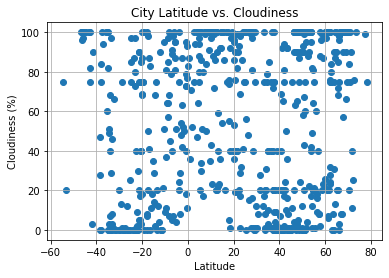

<Figure size 432x288 with 0 Axes>

In [18]:
plt.scatter(
    x=clean_weather_df['Lat'],
    y=clean_weather_df['Cloudiness']
)
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.show()

plt.savefig('output_data/Cloudiness (%) vs. Latitude.png')

In [19]:
print('No clear pattern between cloudiness and locations near the equator.')

No clear pattern between cloudiness and locations near the equator.


## Latitude vs. Wind Speed Plot

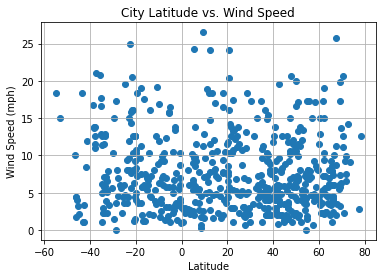

<Figure size 432x288 with 0 Axes>

In [20]:
plt.scatter(
    x=clean_weather_df['Lat'],
    y=clean_weather_df['Wind Speed']
)
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.show()

plt.savefig('output_Data/Wind Speed (mph) vs. Latitude.png')

In [21]:
print('There does not seem to be a clear correlation between location from the equator and wind speeds.')

There does not seem to be a clear correlation between location from the equator and wind speeds.


## Linear Regression

In [22]:
# OPTIONAL: Create a function to create Linear Regression plots
def lin_reg_plt(x_axis,xaxis, y_axis,yaxis):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    print(f"The r-squared is: {rvalue}")
    print(f"The linear equation is: {line_eq}")
    plt.scatter(x_axis,y_axis)
    plt.plot(x_axis,regress_values,"r-")
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    plt.show()

In [23]:
# Create Northern and Southern Hemisphere DataFrames
north_hem_df = clean_weather_df.loc[clean_weather_df['Lat'] >= 0]
south_hem_df = clean_weather_df.loc[clean_weather_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.6212568193216675
The linear equation is: y = -0.48x + 91.12


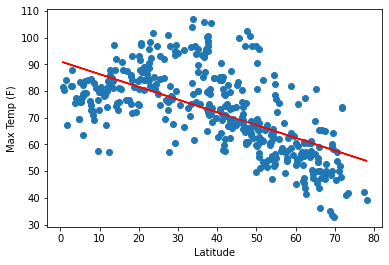

<Figure size 432x288 with 0 Axes>

In [24]:
x_axis = north_hem_df['Lat']
y_axis = north_hem_df['Max Temp']

lin_reg_plt(x_axis, 'Latitude', y_axis, 'Max Temp (F)')

plt.savefig('output_data/Northern Hemisphere - Temperature (F) vs. Latitude.png')

In [25]:
print('We see a clear correlation that the further away we get from the equator, the colder the temperature.')

We see a clear correlation that the further away we get from the equator, the colder the temperature.


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8207023971150215
The linear equation is: y = 0.72x + 79.44


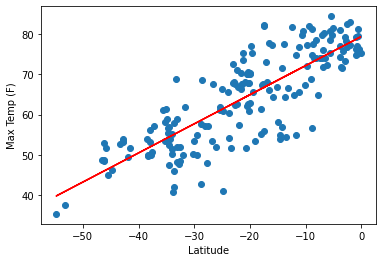

<Figure size 432x288 with 0 Axes>

In [26]:
x_axis = south_hem_df['Lat']
y_axis = south_hem_df['Max Temp']

lin_reg_plt(x_axis, 'Latitude', y_axis, 'Max Temp (F)')

plt.savefig('output_data/Southern Hemisphere - Temperature (F) vs. Latitude.png')

In [27]:
print('We see a clear correlation that the further away we get from the equator, the colder the temperature.')

We see a clear correlation that the further away we get from the equator, the colder the temperature.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.07758317860859394
The linear equation is: y = -0.09x + 72.67


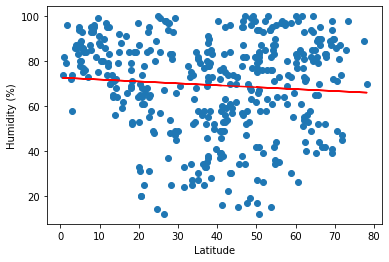

<Figure size 432x288 with 0 Axes>

In [28]:
x_axis = north_hem_df['Lat']
y_axis = north_hem_df['Humidity']

lin_reg_plt(x_axis, 'Latitude', y_axis, 'Humidity (%)')

plt.savefig('output_data/Northern Hemisphere - Humidity (%) vs. Latitude.png')

In [29]:
print('There appears to be no direct relationship between location from the equator and humidity levels.')

There appears to be no direct relationship between location from the equator and humidity levels.


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.015392246937111212
The linear equation is: y = -0.02x + 69.79


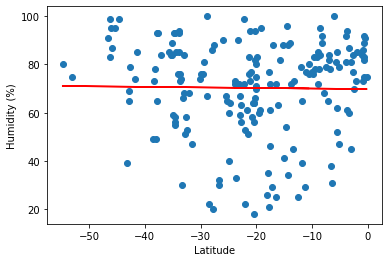

<Figure size 432x288 with 0 Axes>

In [30]:
x_axis = south_hem_df['Lat']
y_axis = south_hem_df['Humidity']

lin_reg_plt(x_axis, 'Latitude', y_axis, 'Humidity (%)')

plt.savefig('output_data/Southern Hemisphere - Humidity (%) vs. Latitude.png')

In [31]:
print('There appears to be no direct relationship between location from the equator and humidity levels, same as in the Northern Hemisphere.')

There appears to be no direct relationship between location from the equator and humidity levels, same as in the Northern Hemisphere.


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.10893769284434929
The linear equation is: y = -0.22x + 62.29


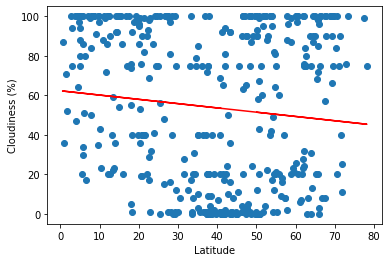

<Figure size 432x288 with 0 Axes>

In [32]:
x_axis = north_hem_df['Lat']
y_axis = north_hem_df['Cloudiness']

lin_reg_plt(x_axis, 'Latitude', y_axis, 'Cloudiness (%)')

plt.savefig('output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude.png')

In [33]:
print('We do not see a strong correlation between location from the equator and cloudiness levels.')

We do not see a strong correlation between location from the equator and cloudiness levels.


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.013036076822227067
The linear equation is: y = 0.04x + 47.27


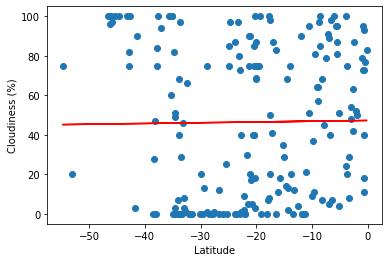

<Figure size 432x288 with 0 Axes>

In [34]:
x_axis = south_hem_df['Lat']
y_axis = south_hem_df['Cloudiness']

lin_reg_plt(x_axis, 'Latitude', y_axis, 'Cloudiness (%)')

plt.savefig('output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude.png')

In [35]:
print('We do not see a strong correlation between location from the equator and cloudiness levels in the Southern Hemisphere as well.')

We do not see a strong correlation between location from the equator and cloudiness levels in the Southern Hemisphere as well.


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.019487380590893028
The linear equation is: y = -0.0x + 7.5


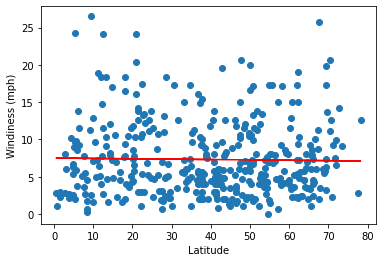

<Figure size 432x288 with 0 Axes>

In [36]:
x_axis = north_hem_df['Lat']
y_axis = north_hem_df['Wind Speed']

lin_reg_plt(x_axis, 'Latitude', y_axis, 'Windiness (mph)')

plt.savefig('output_data/Northern Hemisphere - Wind Speed (mph) vs. Latitude.png')

In [37]:
print('There appears to be no correlation between location from the equator and wind speeds.')

There appears to be no correlation between location from the equator and wind speeds.


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.1608600255614901
The linear equation is: y = -0.06x + 6.67


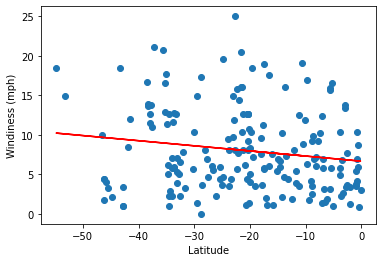

<Figure size 432x288 with 0 Axes>

In [38]:
x_axis = south_hem_df['Lat']
y_axis = south_hem_df['Wind Speed']

lin_reg_plt(x_axis, 'Latitude', y_axis, 'Windiness (mph)')

plt.savefig('output_data/Southern Hemisphere - Wind Speed (mph) vs. Latitude.png')

In [39]:
print('There appears to be little to no correlation between location from the equator and wind speeds.')

There appears to be little to no correlation between location from the equator and wind speeds.
